In [2]:
# 경사하강법(Gradient descent method)에 대해 알아본다.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 데이터를 생성해보자!
# 보통 변수앞에 붙는 상수를 weight(가중치)라 하고, 뒤에 상수를 bias(편향) 이라 한다. 

def make_linear(w, b, size = 50, noise = 1.0):
  x = np.linspace(0,1,size)
  y_reg = w*x + b

  np.random.seed(10)
  noise = noise * np.random.normal(size = size) # 표준정규분포를 따르는 데이터 생성

  y = y_reg + noise

  return x, y, y_reg

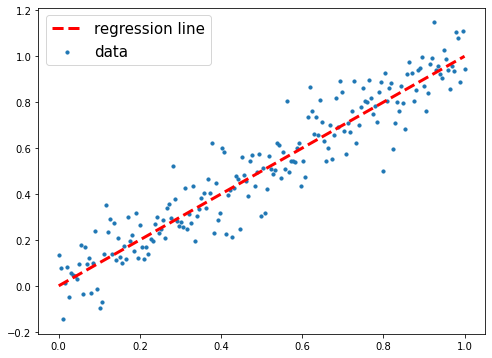

In [28]:
x, y, y_reg = make_linear(w = 1, b = 0, size = 200, noise = 0.1)

plt.figure(figsize = (8,6))
plt.plot(x, y_reg, 'r--', label = 'regression line', linewidth = 3)
plt.scatter(x, y, label = 'data', s = 10)
plt.legend(fontsize = 15)
plt.show()

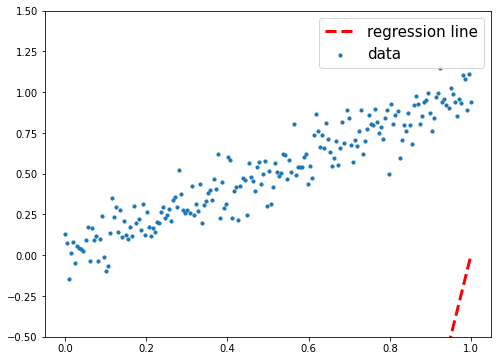

In [63]:
w = 10
b = -10
y_hat = w*x + b

plt.figure(figsize = (8,6))
plt.plot(x, y_hat, 'r--', label = 'regression line', linewidth = 3)
plt.scatter(x, y, label = 'data', s = 10)
plt.legend(fontsize = 15)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.5, 1.5])
plt.show()

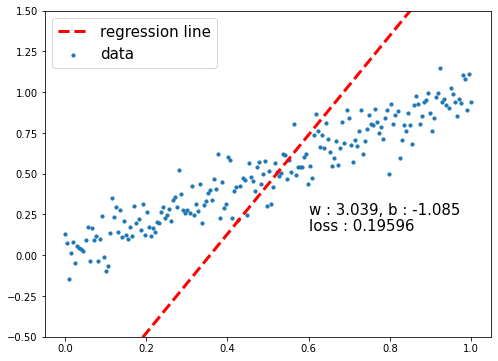

In [40]:
# 경사하강법

learning_rate = 0.5

# learning! : w와 b를 학습한다!
w = w - learning_rate * ((y_hat - y) * x).mean() 
b = b - learning_rate * (y_hat - y).mean()

loss = ((y - y_hat)**2).mean() / 2

# update된 parameter 적용시키기

y_hat = w*x + b


# 시각화
plt.figure(figsize = (8,6))
plt.plot(x, y_hat, 'r--', label = 'regression line', linewidth = 3)
plt.scatter(x, y, label = 'data', s = 10)
plt.text(0.6, 0.25, "w : {:1.3f}, b : {:1.3f}".format(w,b), fontsize = 15)
plt.text(0.6, 0.15, "loss : {:1.5f}".format(loss), fontsize = 15)

plt.legend(fontsize = 15)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.5, 1.5])
plt.show()

In [64]:
# 자동으로 계속 반복해보자!

w_list = []
b_list = []
loss_list = []

# inital setting 
w = 10
b = -10
learning_rate = 0.002
num_epoch = 50000


# 반복횟수만큼 하는게 너무 비효율적일 수 있으니, 조건을 걸어 break 한다!

for epoch in range(num_epoch):
  y_hat = w*x + b

  w = w - learning_rate * ((y_hat - y) * x).mean() 
  b = b - learning_rate * (y_hat - y).mean()

  loss = ((y - y_hat)**2).mean() / 2

  if loss < 0.00001:
    print("{} 번 실행 후 종료".format(epoch))
    break

  loss_list.append(loss)
  w_list.append(w)
  b_list.append(b)

  if epoch % 500 == 0:
    print("{} epoch | w = {:1.3f}, b = {:1.3f}, loss = {:1.5f}".format(epoch, w, b, loss))

  
print(w, b, loss)

0 epoch | w = 10.004, b = -9.989, loss = 18.58460
500 epoch | w = 10.835, b = -6.714, loss = 5.71461
1000 epoch | w = 10.599, b = -5.542, loss = 4.17076
1500 epoch | w = 10.093, b = -4.978, loss = 3.58686
2000 epoch | w = 9.540, b = -4.599, loss = 3.13621
2500 epoch | w = 9.000, b = -4.286, loss = 2.74639
3000 epoch | w = 8.488, b = -4.006, loss = 2.40543
3500 epoch | w = 8.007, b = -3.746, loss = 2.10689
4000 epoch | w = 7.557, b = -3.505, loss = 1.84548
4500 epoch | w = 7.135, b = -3.279, loss = 1.61658
5000 epoch | w = 6.741, b = -3.067, loss = 1.41614
5500 epoch | w = 6.371, b = -2.870, loss = 1.24063
6000 epoch | w = 6.026, b = -2.684, loss = 1.08695
6500 epoch | w = 5.703, b = -2.511, loss = 0.95237
7000 epoch | w = 5.400, b = -2.349, loss = 0.83453
7500 epoch | w = 5.117, b = -2.198, loss = 0.73135
8000 epoch | w = 4.852, b = -2.056, loss = 0.64099
8500 epoch | w = 4.604, b = -1.923, loss = 0.56188
9000 epoch | w = 4.372, b = -1.799, loss = 0.49260
9500 epoch | w = 4.155, b = -1

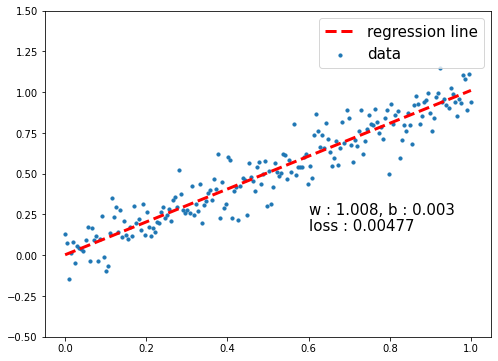

In [65]:
# 시각화
plt.figure(figsize = (8,6))
plt.plot(x, y_hat, 'r--', label = 'regression line', linewidth = 3)
plt.scatter(x, y, label = 'data', s = 10)
plt.text(0.6, 0.25, "w : {:1.3f}, b : {:1.3f}".format(w,b), fontsize = 15)
plt.text(0.6, 0.15, "loss : {:1.5f}".format(loss), fontsize = 15)

plt.legend(fontsize = 15)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.5, 1.5])
plt.show()

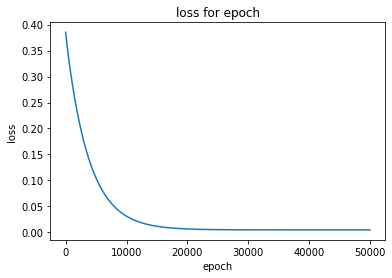

In [62]:
# loss 시각화 하기.

plt.plot(loss_list)
plt.title("loss for epoch")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [70]:
# 해석적방법

X, Y, y_reg = make_linear(w = 1, b = 0, size = 200, noise = 0.1)

np.cov(X,Y)

array([[0.08459382, 0.08403326],
       [0.08403326, 0.09305109]])

In [71]:
w = (np.cov(X,Y)[0,1]) / np.var(X)
b = Y.mean() - w * X.mean()

Y_hat = w*X + b

loss = ((Y - Y_hat)**2).mean() / 2

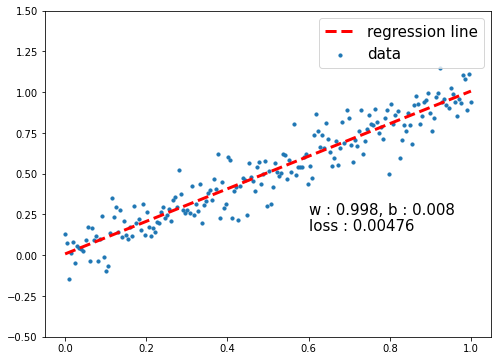

In [72]:
# 시각화
plt.figure(figsize = (8,6))
plt.plot(X, Y_hat, 'r--', label = 'regression line', linewidth = 3)
plt.scatter(X, Y, label = 'data', s = 10)
plt.text(0.6, 0.25, "w : {:1.3f}, b : {:1.3f}".format(w,b), fontsize = 15)
plt.text(0.6, 0.15, "loss : {:1.5f}".format(loss), fontsize = 15)

plt.legend(fontsize = 15)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.5, 1.5])
plt.show()

-559.8742633538625


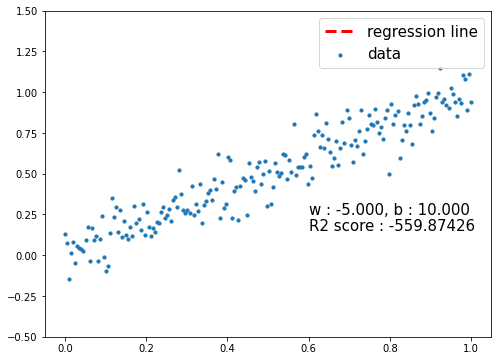

In [84]:
# R2 score
# R2 = 1 - SSE/SST

X, Y, y_reg = make_linear(w = 1, b =0, size = 200, noise = 0.1)

w = -5
b = 10

Y_bar = Y.mean()
Y_hat = w*X + b

SST = sum((Y_bar - y) ** 2)
SSE = sum((Y - Y_hat) ** 2)
SSR = SST - SSE

R2_score = 1 - SSE/SST
print(R2_score)


# 시각화
plt.figure(figsize = (8,6))
plt.plot(X, Y_hat, 'r--', label = 'regression line', linewidth = 3)
plt.scatter(X, Y, label = 'data', s = 10)
plt.text(0.6, 0.25, "w : {:1.3f}, b : {:1.3f}".format(w,b), fontsize = 15)
plt.text(0.6, 0.15, "R2 score : {:1.5f}".format(R2_score), fontsize = 15)

plt.legend(fontsize = 15)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.5, 1.5])
plt.show()

In [85]:
# 문제1 

def LR_GD(X, Y, w, b, num_epoch, learning_rate):
  # w_list = []
  # b_list = []
  loss_list = []

  for epoch in range(num_epoch):
    Y_hat = w*X + b

    w = w - learning_rate * ((Y_hat - Y) * X).mean() 
    b = b - learning_rate * (Y_hat - Y).mean()

    loss = ((Y - Y_hat)**2).mean() / 2

    if loss < 0.00005:
      print("{} 번 실행 후 종료".format(epoch))
      break

    loss_list.append(loss)
    # w_list.append(w)
    # b_list.append(b)

    if epoch % 500 == 0:
      print("{} epoch | w = {:1.3f}, b = {:1.3f}, loss = {:1.5f}".format(epoch, w, b, loss))

  return w, b, loss, loss_list

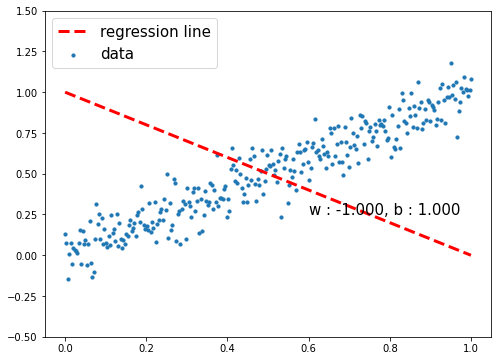

In [89]:
X, Y, y_reg = make_linear(w = 1, b = 0, size = 300, noise = 0.1)

w = -1
b = 1

Y_hat = w*X + b

# 시각화
plt.figure(figsize = (8,6))
plt.plot(X, Y_hat, 'r--', label = 'regression line', linewidth = 3)
plt.scatter(X, Y, label = 'data', s = 10)
plt.text(0.6, 0.25, "w : {:1.3f}, b : {:1.3f}".format(w,b), fontsize = 15)
# plt.text(0.6, 0.15, "loss : {:1.5f}".format(R2_score), fontsize = 15)

plt.legend(fontsize = 15)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.5, 1.5])
plt.show()

In [90]:
learning = 0.001
num_epoch = 20000

w, b, loss, loss_list = LR_GD(X, Y, w, b, num_epoch, learning_rate)

0 epoch | w = -1.000, b = 1.000, loss = 0.17044
500 epoch | w = -0.852, b = 0.974, loss = 0.14769
1000 epoch | w = -0.728, b = 0.923, loss = 0.12977
1500 epoch | w = -0.617, b = 0.868, loss = 0.11424
2000 epoch | w = -0.514, b = 0.814, loss = 0.10064
2500 epoch | w = -0.417, b = 0.763, loss = 0.08873
3000 epoch | w = -0.327, b = 0.714, loss = 0.07830
3500 epoch | w = -0.243, b = 0.669, loss = 0.06916
4000 epoch | w = -0.164, b = 0.627, loss = 0.06115
4500 epoch | w = -0.090, b = 0.588, loss = 0.05414
5000 epoch | w = -0.021, b = 0.551, loss = 0.04799
5500 epoch | w = 0.043, b = 0.516, loss = 0.04261
6000 epoch | w = 0.104, b = 0.484, loss = 0.03789
6500 epoch | w = 0.161, b = 0.453, loss = 0.03376
7000 epoch | w = 0.214, b = 0.425, loss = 0.03014
7500 epoch | w = 0.263, b = 0.398, loss = 0.02697
8000 epoch | w = 0.310, b = 0.373, loss = 0.02420
8500 epoch | w = 0.353, b = 0.350, loss = 0.02176
9000 epoch | w = 0.394, b = 0.328, loss = 0.01963
9500 epoch | w = 0.432, b = 0.308, loss = 0

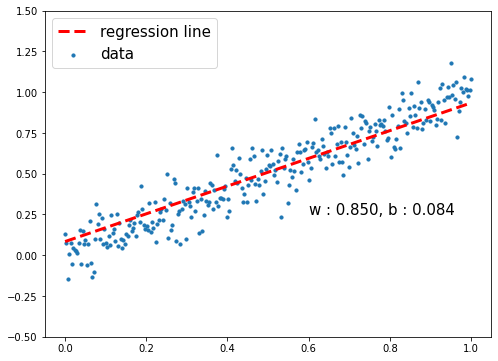

In [91]:
Y_hat = w*X + b

# 시각화
plt.figure(figsize = (8,6))
plt.plot(X, Y_hat, 'r--', label = 'regression line', linewidth = 3)
plt.scatter(X, Y, label = 'data', s = 10)
plt.text(0.6, 0.25, "w : {:1.3f}, b : {:1.3f}".format(w,b), fontsize = 15)
# plt.text(0.6, 0.15, "loss : {:1.5f}".format(R2_score), fontsize = 15)

plt.legend(fontsize = 15)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.5, 1.5])
plt.show()